In [1]:
import numpy as np
import os
import tifffile as tiff
import matplotlib.pyplot as plt
import glob
import re

In [2]:
import skimage.io as io

# 数据读取

In [3]:
#文件名自然排序
def natural_sort_key(s):
    sub_strings = re.split(r'(\d+)', s)
    sub_strings = [int(c) if c.isdigit() else c for c in sub_strings]
    return sub_strings



In [4]:
#folder_path = "D:/Gauss_1.0_0.3/"
folder_path = "D:/project/dataset/Gauss_1.0_0.3/"

#获取不同类别图片路径并加入到对应的list中
emcal_list = sorted(glob.glob(os.path.join(folder_path, 'emcal_*')), key=natural_sort_key)
hcal_list = sorted(glob.glob(os.path.join(folder_path, 'hcal_*')), key=natural_sort_key)
tracker_list = sorted(glob.glob(os.path.join(folder_path, 'tracker_*')), key=natural_sort_key)
truth_list = sorted(glob.glob(os.path.join(folder_path, 'truth_*')), key=natural_sort_key)

specified_files = list(zip(emcal_list, hcal_list, tracker_list, truth_list))



- 使用tifffile读取

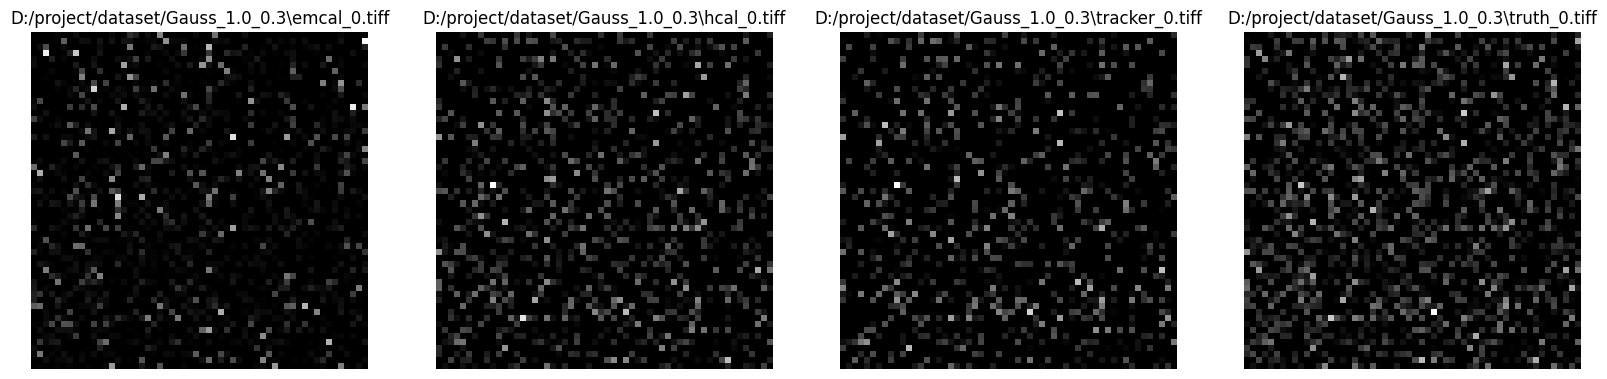

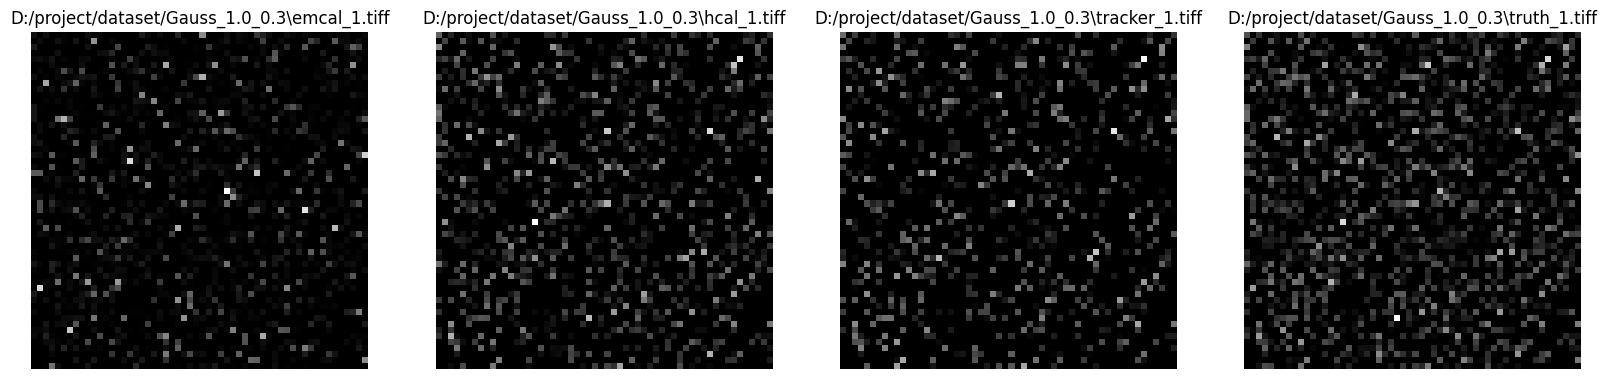

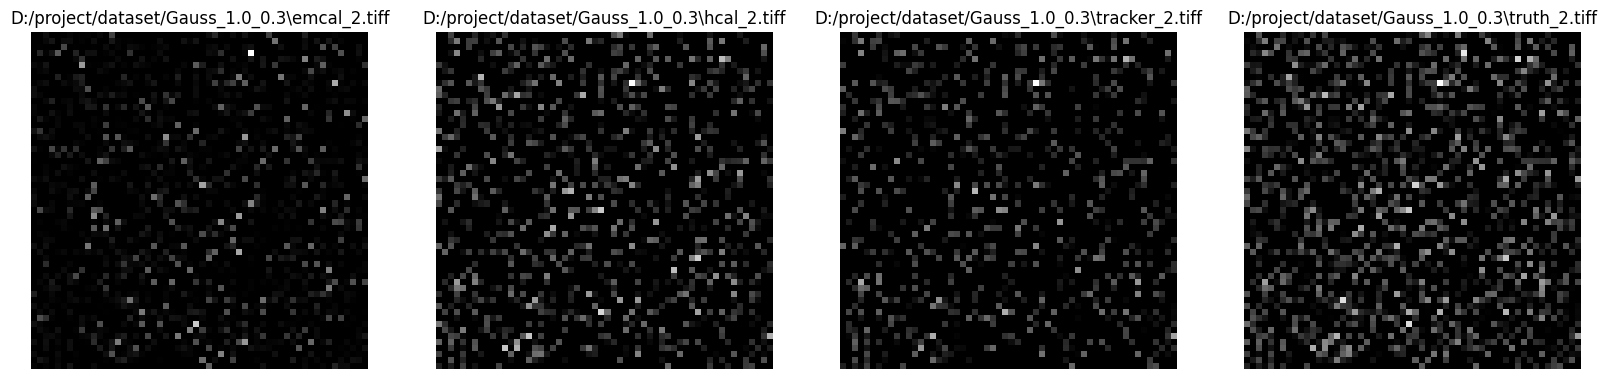

In [5]:
# 显示前3组图片
for i in range(3):
    # 创建一个包含四个子图的图形
    fig, axes = plt.subplots(1, 4, figsize=(20, 10))

    # 遍历并显示每张 TIFF 图片
    for ax, tiff_file in zip(axes, specified_files[i]):
        tiff_path = os.path.join(folder_path, tiff_file)
        img = tiff.imread(tiff_path)        
        # 显示图像
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(tiff_file)
    # 显示整个图形
    plt.show()

- 使用skimage读取

In [6]:
emcal_data,hcal_data,tracker_data,truth_data=np.zeros((1000,56,56)),np.zeros((1000,56,56)),np.zeros((1000,56,56)),np.zeros((1000,56,56))
for i in range(len(emcal_list)):
    emcal_data[i]=io.imread(specified_files[i][0])
    hcal_data[i]=io.imread(specified_files[i][1])
    tracker_data[i]=io.imread(specified_files[i][2])
    truth_data[i]=io.imread(specified_files[i][3])


# 绘制对比图

In [7]:
emcal_data_squeeze=emcal_data.reshape(1000,-1)
hcal_data_squeeze=hcal_data.reshape(1000,-1)
tracker_data_squeeze=tracker_data.reshape(1000,-1)
truth_data_squeeze=truth_data.reshape(1000,-1)



- scatter plot

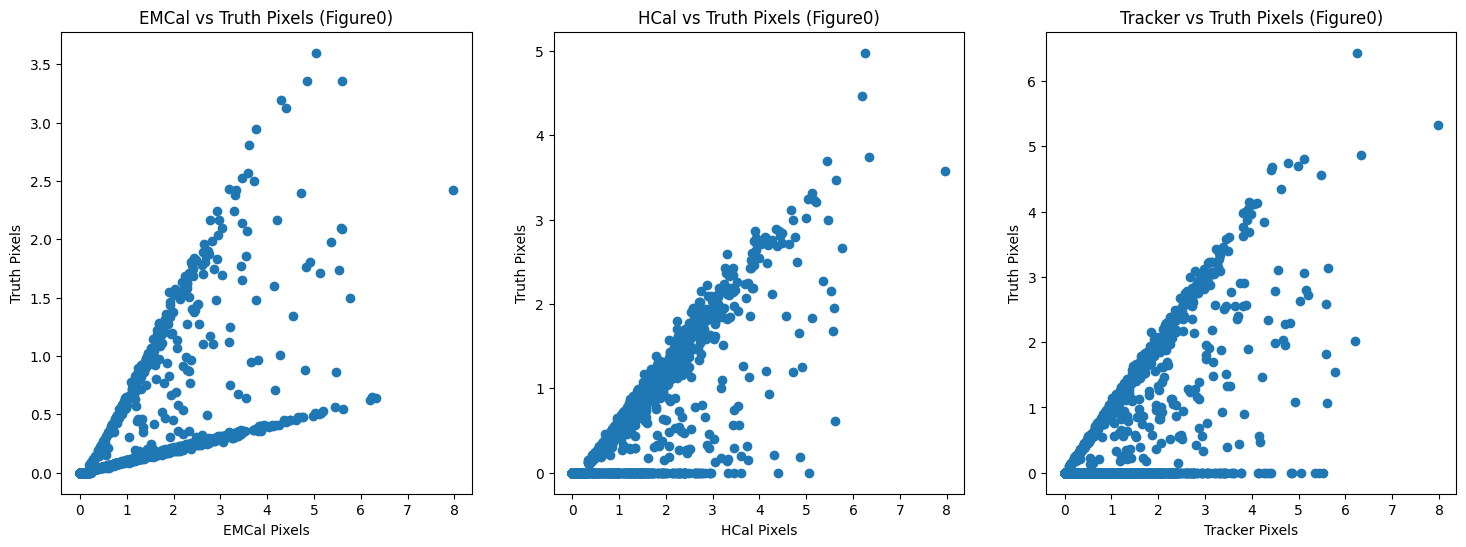

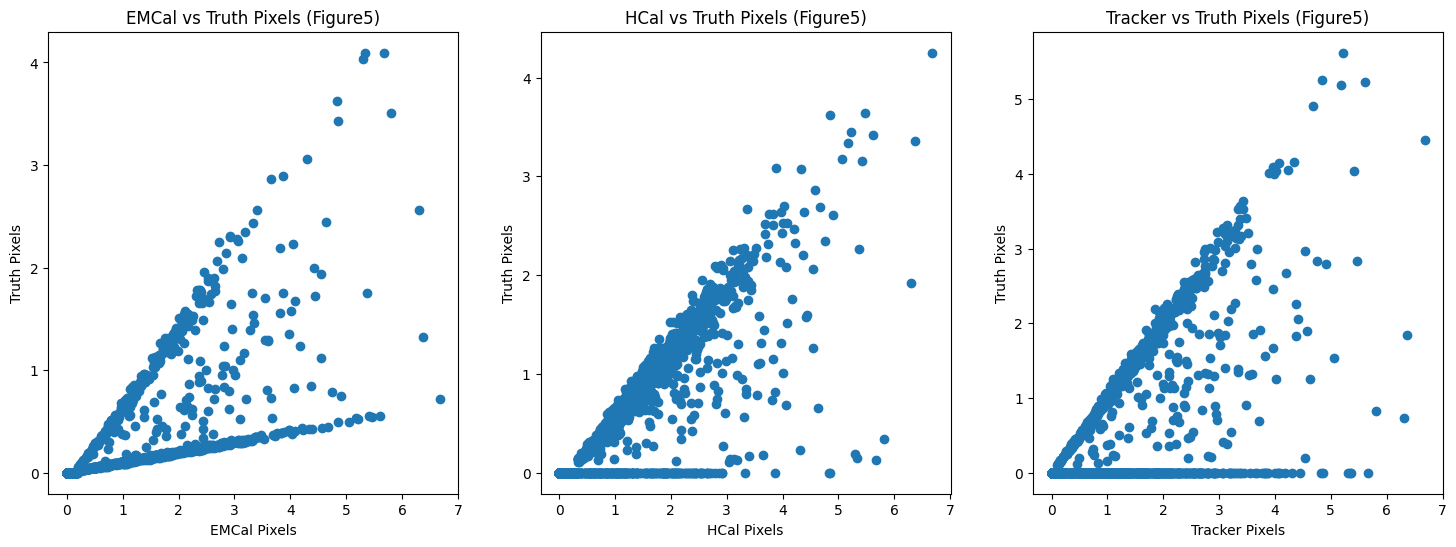

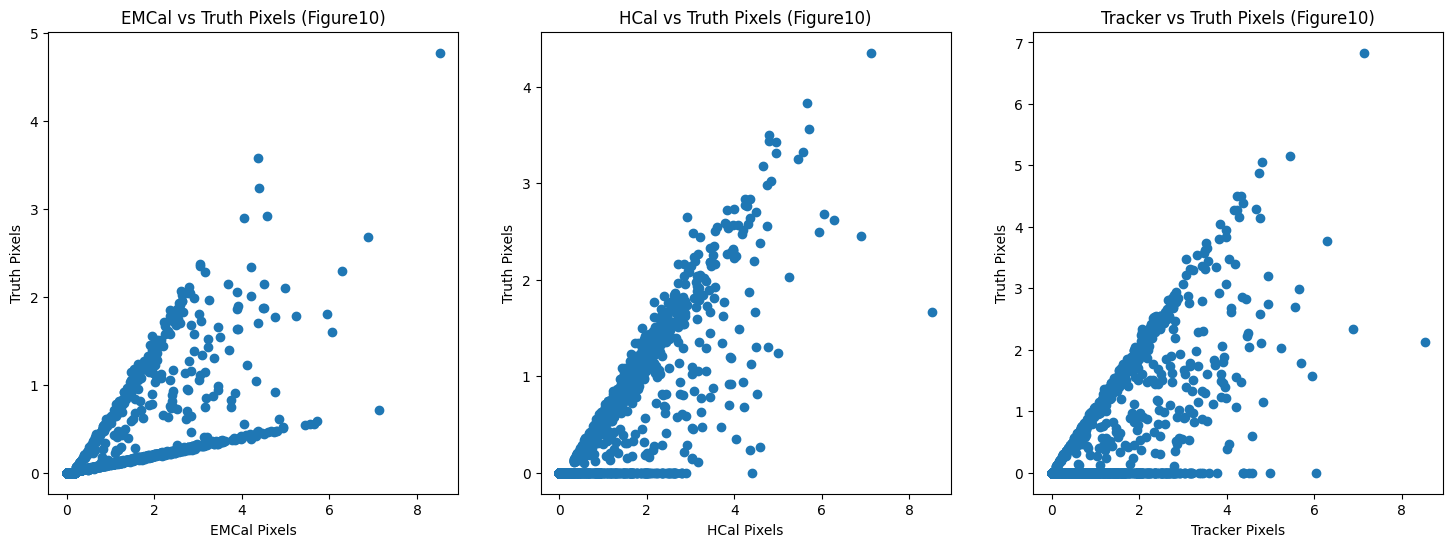

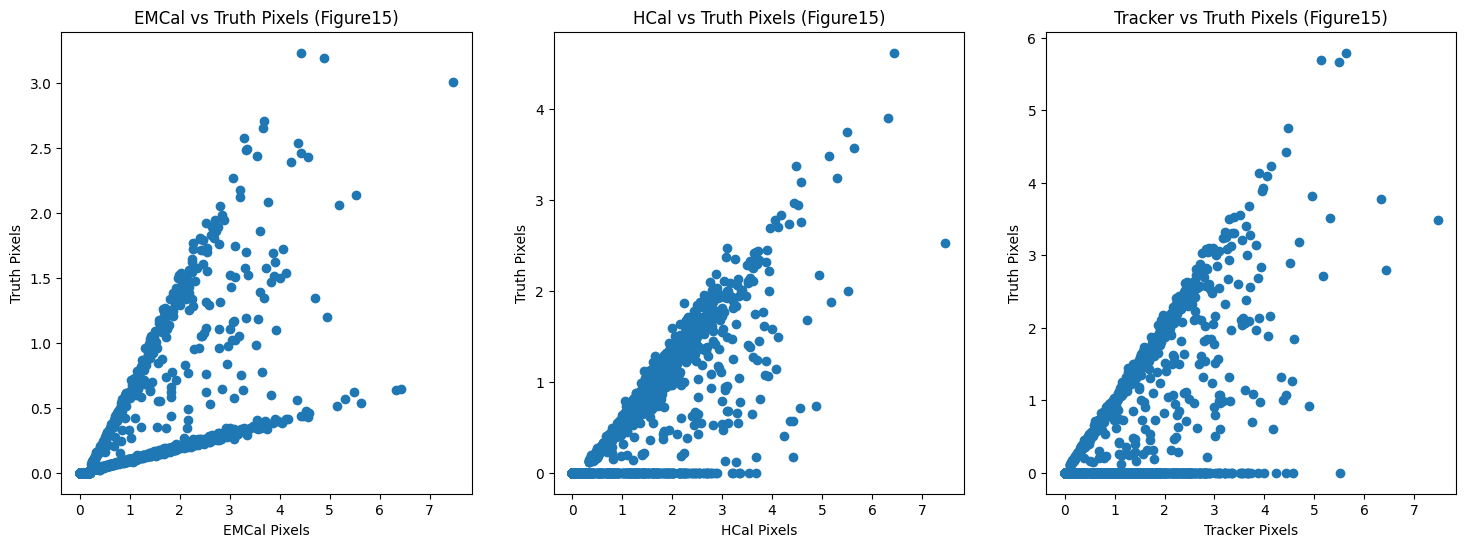

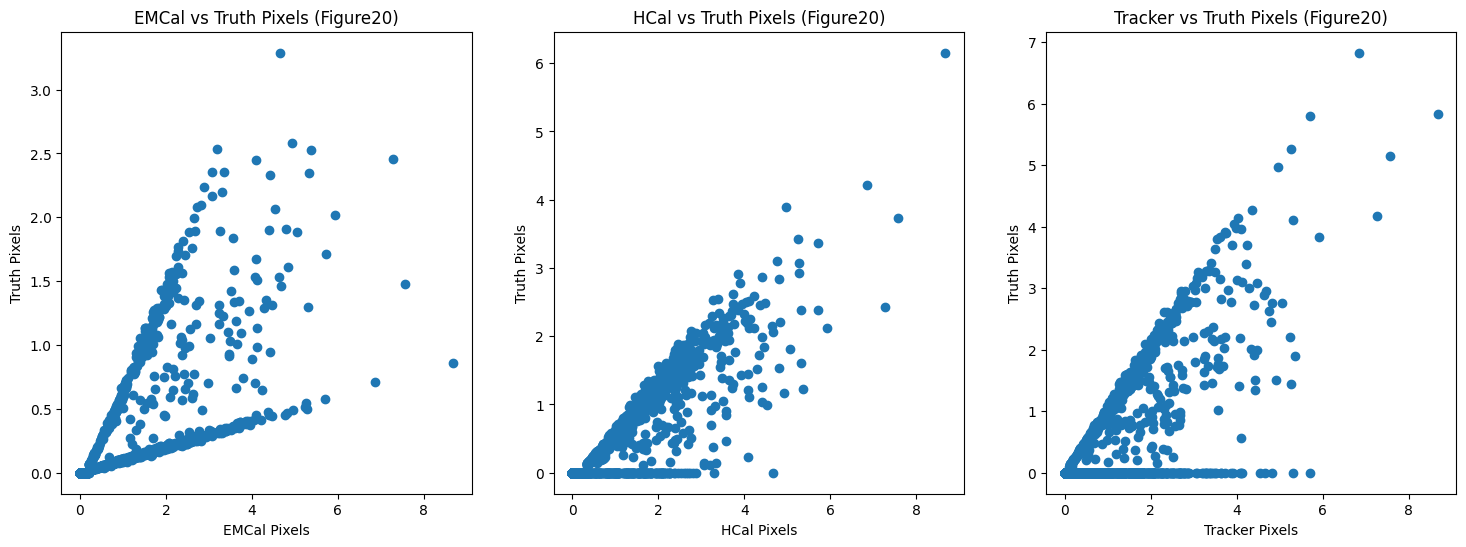

In [8]:
for i in [0,5,10,15,20]:
    fig, ax = plt.subplots(1,3, figsize=(18, 6))
    # 绘制散点图
    ax[0].scatter( truth_data_squeeze[i],emcal_data_squeeze[i])
    ax[0].set_title(f'EMCal vs Truth Pixels (Figure{i})')
    ax[0].set_xlabel('EMCal Pixels')
    ax[0].set_ylabel('Truth Pixels')
    ax[0].set_ylabel('Truth Pixels')


    ax[1].scatter( truth_data_squeeze[i],hcal_data_squeeze[i])
    ax[1].set_title(f'HCal vs Truth Pixels (Figure{i})')
    ax[1].set_xlabel('HCal Pixels')
    ax[1].set_ylabel('Truth Pixels')

    ax[2].scatter(truth_data_squeeze[i],tracker_data_squeeze[i] )
    ax[2].set_title(f'Tracker vs Truth Pixels (Figure{i})')
    ax[2].set_xlabel('Tracker Pixels')
    ax[2].set_ylabel('Truth Pixels')

- hist plot

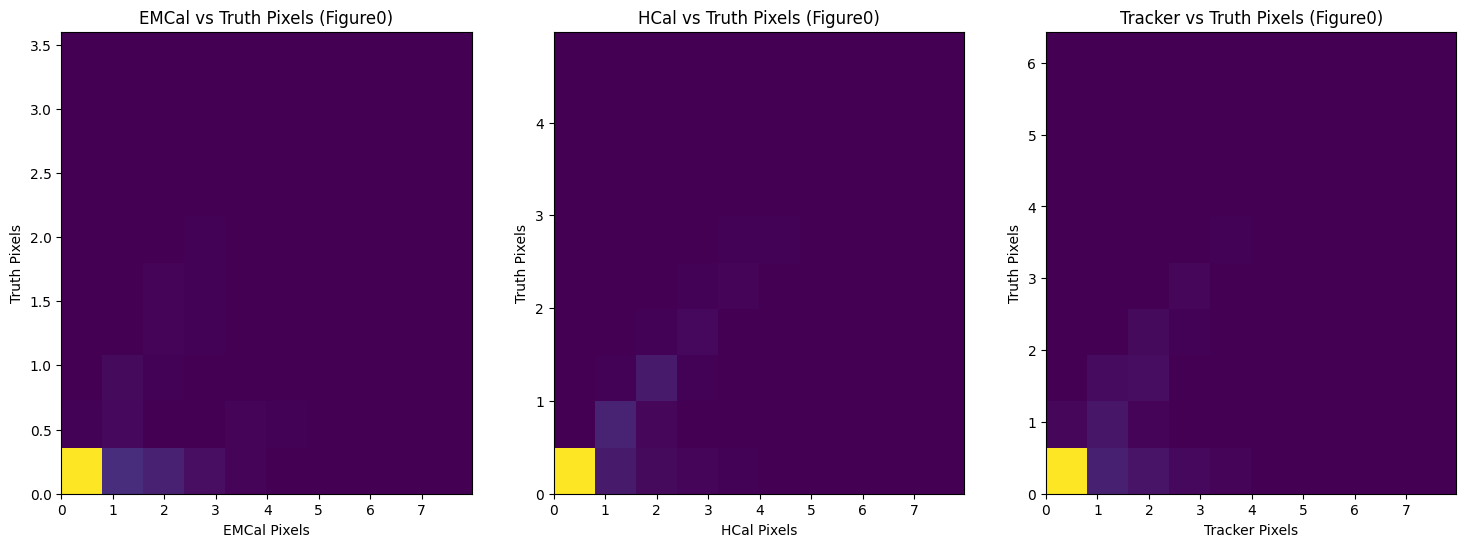

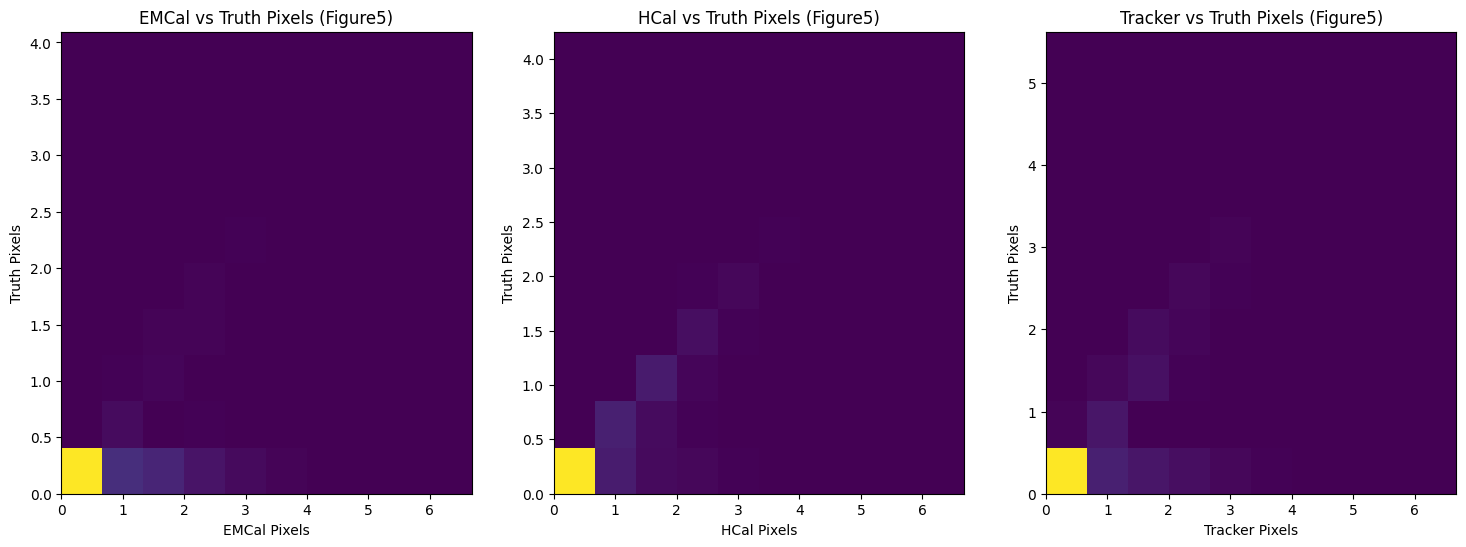

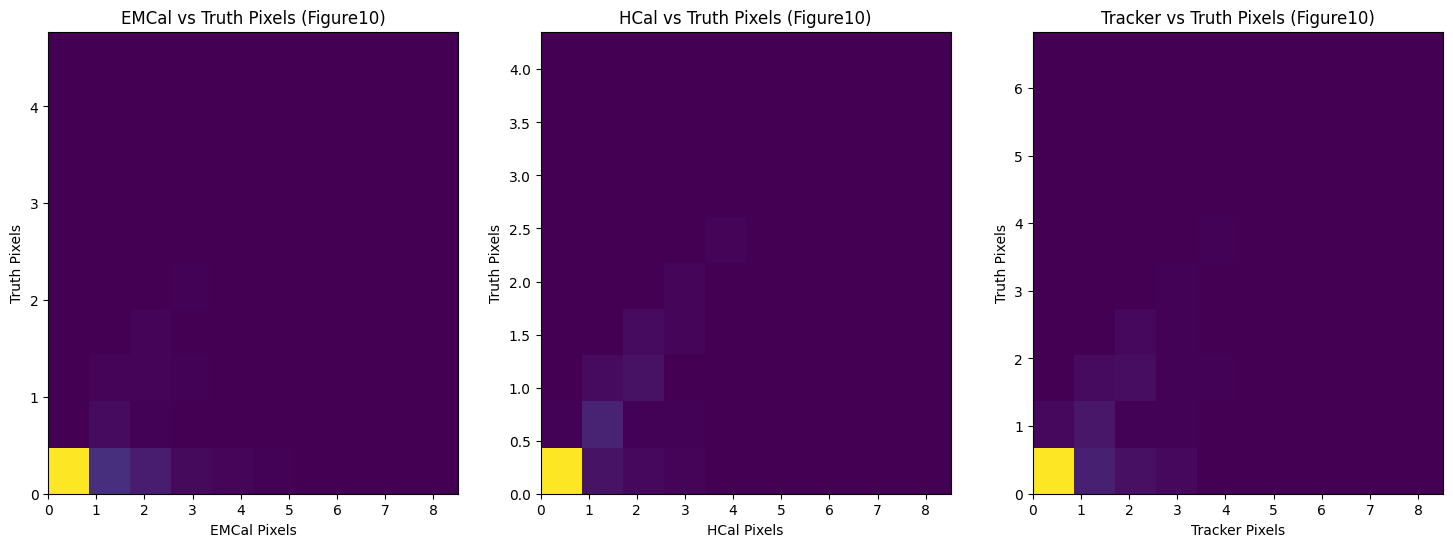

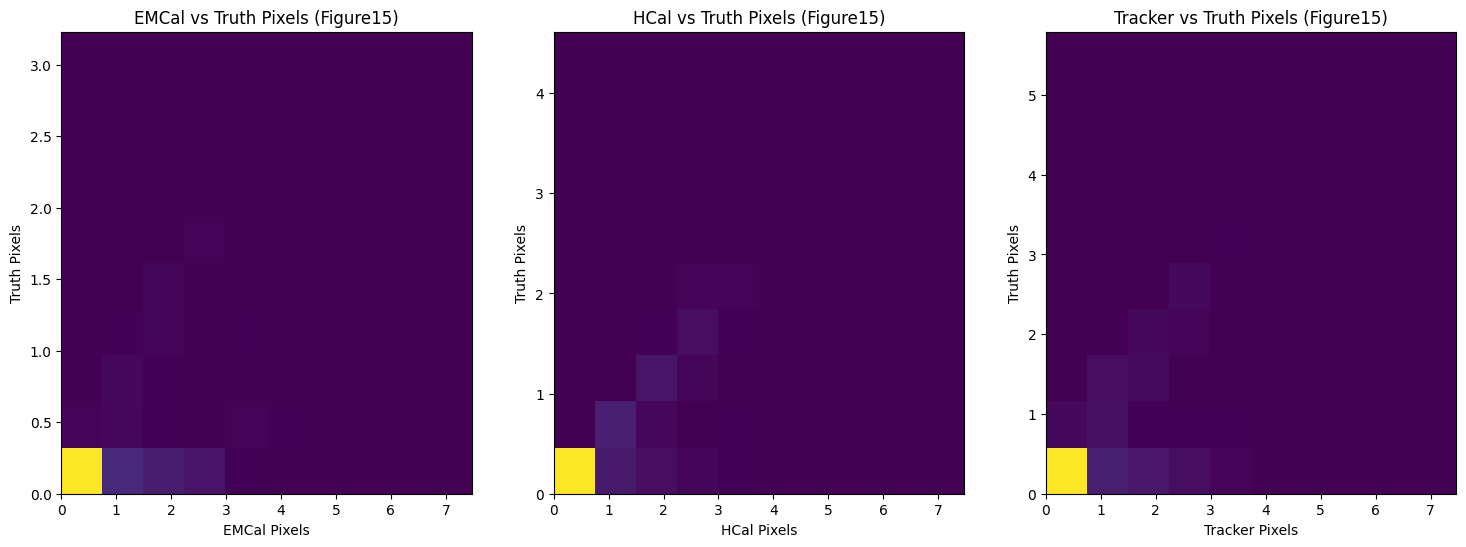

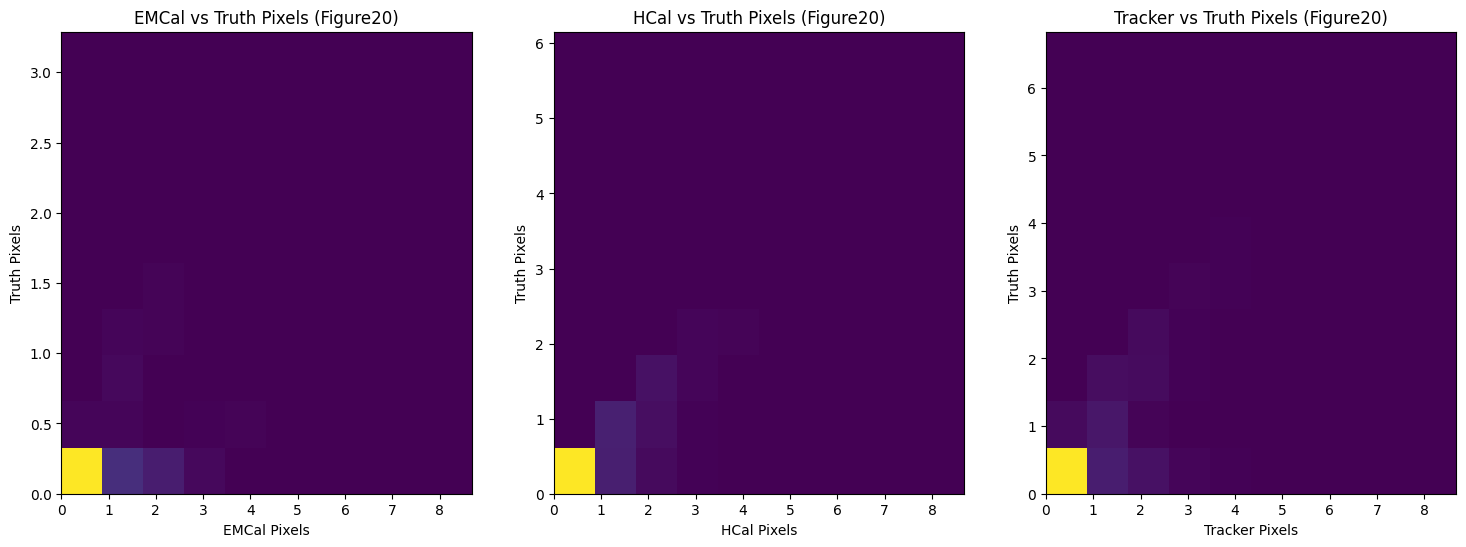

In [9]:
for i in [0,5,10,15,20]:
    fig, ax = plt.subplots(1,3, figsize=(18, 6))
    # 绘制散点图
    ax[0].hist2d(truth_data_squeeze[i],emcal_data_squeeze[i], bins=10, cmap='viridis')
    ax[0].set_title(f'EMCal vs Truth Pixels (Figure{i})')
    ax[0].set_xlabel('EMCal Pixels')
    ax[0].set_ylabel('Truth Pixels')
    ax[0].set_ylabel('Truth Pixels')


    ax[1].hist2d(truth_data_squeeze[i],hcal_data_squeeze[i],  bins=10, cmap='viridis')
    ax[1].set_title(f'HCal vs Truth Pixels (Figure{i})')
    ax[1].set_xlabel('HCal Pixels')
    ax[1].set_ylabel('Truth Pixels')

    ax[2].hist2d(truth_data_squeeze[i],tracker_data_squeeze[i],  bins=10, cmap='viridis')
    ax[2].set_title(f'Tracker vs Truth Pixels (Figure{i})')
    ax[2].set_xlabel('Tracker Pixels')
    ax[2].set_ylabel('Truth Pixels')

- 三幅图像素直接相加得到sum_all_data，计算压缩后的sum_all_data序列与truth_data_squeeze序列的相关系数

In [10]:
sum_all_data_squeeze=emcal_data_squeeze+hcal_data_squeeze+tracker_data_squeeze

In [11]:
co=[]
for i in range(1000):
    co.append(np.corrcoef(sum_all_data_squeeze[i], truth_data_squeeze[i])[0][1])
print(co)

[0.9230920715941711, 0.9186526078255273, 0.9200076458095219, 0.9215687508588597, 0.9265854893706219, 0.9154065141376891, 0.9176136055862775, 0.9184745085992085, 0.9267045324915378, 0.927850350672619, 0.9278011673159579, 0.9224607064797541, 0.9232880234560694, 0.9229405896101928, 0.9247075205153392, 0.9182771221600405, 0.9164051422927432, 0.9253548014715964, 0.9222723312932019, 0.9207303469889745, 0.9299013342471741, 0.9207826510197362, 0.9216192507459599, 0.9212769810186836, 0.9314247367525181, 0.9207510733887956, 0.9228237540776769, 0.9245672699124147, 0.9159086468083182, 0.9221141852036424, 0.9245466053444793, 0.9115016782838302, 0.9185037000445716, 0.924095986311612, 0.9147171910336146, 0.9214733484508421, 0.9211880933170065, 0.9215901642926335, 0.9283502615403433, 0.9183246012179628, 0.9144344523177835, 0.9271384411609698, 0.9155590129066858, 0.9232393896860459, 0.9245724090743074, 0.9243817111264004, 0.9245991432263784, 0.9256415447132684, 0.9235683262191774, 0.9251145277687253, 0

In [12]:
np.save('emcal_data_squeeze.npy', emcal_data_squeeze)
np.save('hcal_data_squeeze.npy', hcal_data_squeeze)
np.save('tracker_data_squeeze.npy', tracker_data_squeeze)
np.save('truth_data_squeeze.npy', truth_data_squeeze)